Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Pre-processing

In [2]:
csv = pd.read_csv("Index2020.csv") 
dataframe =csv.copy()
dataframe.date = pd.to_datetime(dataframe.date, dayfirst = True) #change to timeserires data
dataframe.set_index("date", inplace=True) #setting timeseries data to index
dataframe = dataframe.asfreq('b') #set frequency to business days
dataframe = dataframe.fillna(method='ffill') #front fill missing data

In [3]:
dataframe['market_value'] = dataframe.spx

In [4]:
size = int(len(dataframe)*0.8) #split data 80%
df_train, df_test = dataframe.iloc[:size], dataframe.iloc[size:]

In [6]:
df_train['returns'] = df_train.market_value.pct_change(1)*100

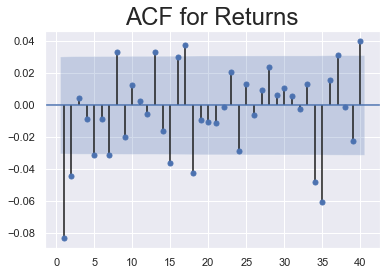

In [35]:
sgt.plot_acf(df_train.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

ARIMAX

In [53]:
armax = ARIMA(df_train.market_value, exog = df_train.dax, order=(1,0,1))
results_armax = armax.fit()
results_armax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(1, 1)   Log Likelihood              -16212.504
Method:                       css-mle   S.D. of innovations             11.565
Date:                Wed, 11 Mar 2020   AIC                          32435.007
Time:                        15:20:03   BIC                          32466.712
Sample:                    01-03-2000   HQIC                         32446.219
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                692.2713     67.445     10.264      0.000     560.082     824.461
dax                    0.1052      0.002     53.969      0.000       0.101       0.109
ar.L1.market_value     0.9983      0.001   1155.989      0.000       0.997       1.000
ma.L1.market_value    -0.2872      0.016    -18.039      0.000      -0.318      -0.256
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0017           +0.0000j            1.0017            0.0000
MA.1            3.4818           +0.0000j            3.4818            0.0000
-----------------------------------------------------------------------------
"""

In [52]:
armax = ARIMA(df_train.market_value, exog = df_train.dax, order=(1,1,1))
results_armax = armax.fit()
results_armax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 4191
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17248.042
Method:                       css-mle   S.D. of innovations             14.829
Date:                Wed, 11 Mar 2020   AIC                          34506.085
Time:                        15:19:02   BIC                          34537.788
Sample:                    01-04-2000   HQIC                         34517.296
                         - 01-26-2016                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3460      0.617     -0.561      0.575      -1.556       0.864
dax                   7.046e-05    9.2e-05      0.766      0.444      -0.000       0.000
ar.L1.D.market_value     0.6043      0.121      5.003      0.000       0.368       0.841
ma.L1.D.market_value    -0.6710      0.113     -5.964      0.000      -0.892      -0.450
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6549           +0.0000j            1.6549            0.0000
MA.1            1.4903           +0.0000j            1.4903            0.0000
-----------------------------------------------------------------------------
"""

SARIMAX

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [58]:
sarimax = SARIMAX(df_train.market_value, exog = df_train.dax, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 4192
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -16216.081
Date:                           Thu, 12 Mar 2020   AIC                          32446.163
Time:                                   22:10:58   BIC                          32490.549
Sample:                               01-03-2000   HQIC                         32461.859
                                    - 01-26-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dax            0.1052      0.001     91.612      0.000       0.103       0.107
ar.L1          0.9998      0.000   2377.341      0.000       0.999       1.001
ma.L1         -0.2906      0.008    -35.325      0.000      -0.307      -0.274
ar.S.L5        0.9880      0.008    130.249      0.000       0.973       1.003
ar.S.L10       0.0117      0.004      2.701      0.007       0.003       0.020
ma.S.L5       -0.9995      0.007   -139.903      0.000      -1.013      -0.985
sigma2       134.0563      1.617     82.914      0.000     130.887     137.225
===================================================================================
Ljung-Box (Q):                       97.88   Jarque-Bera (JB):              3697.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
sarimax = SARIMAX(df_train.market_value, exog = df_train.dax, order=(2,0,2), seasonal_order = (1,0,1,5))
results_sarimax = sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        market_value   No. Observations:                 4192
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 5)   Log Likelihood              -16215.235
Date:                             Thu, 12 Mar 2020   AIC                          32446.470
Time:                                     22:11:04   BIC                          32497.198
Sample:                                 01-03-2000   HQIC                         32464.409
                                      - 01-26-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dax            0.1050      0.001     91.403      0.000       0.103       0.107
ar.L1          0.0389      0.055      0.707      0.479      -0.069       0.147
ar.L2          0.9609      0.055     17.468      0.000       0.853       1.069
ma.L1          0.6743      0.057     11.925      0.000       0.563       0.785
ma.L2         -0.2717      0.020    -13.751      0.000      -0.310      -0.233
ar.S.L5        0.9907      0.036     27.464      0.000       0.920       1.061
ma.S.L5       -0.9919      0.035    -28.674      0.000      -1.060      -0.924
sigma2       134.2850      1.675     80.180      0.000     131.002     137.568
===================================================================================
Ljung-Box (Q):                       95.66   Jarque-Bera (JB):              3632.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.24
Prob(H) (two-sided):                  0.09   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
sarimax = SARIMAX(df_train.market_value, exog = df_train.dax, order=(3,0,4), seasonal_order = (3,0,2,5))
results_sarimax = sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                           market_value   No. Observations:                 4192
Model:             SARIMAX(3, 0, 4)x(3, 0, [1, 2], 5)   Log Likelihood              -16216.250
Date:                                Thu, 12 Mar 2020   AIC                          32460.501
Time:                                        22:11:55   BIC                          32549.274
Sample:                                    01-03-2000   HQIC                         32491.894
                                         - 01-26-2016                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dax            0.1051      0.001     89.232      0.000       0.103       0.107
ar.L1         -0.8900      0.039    -23.073      0.000      -0.966      -0.814
ar.L2          0.9413      0.015     61.762      0.000       0.911       0.971
ar.L3          0.9487      0.029     32.995      0.000       0.892       1.005
ma.L1          1.5958      0.037     43.257      0.000       1.524       1.668
ma.L2          0.3599      0.021     16.753      0.000       0.318       0.402
ma.L3         -0.3456      0.012    -28.093      0.000      -0.370      -0.322
ma.L4         -0.0337      0.008     -4.444      0.000      -0.049      -0.019
ar.S.L5        0.0216      0.003      6.315      0.000       0.015       0.028
ar.S.L10       0.9695      0.010    100.204      0.000       0.951       0.988
ar.S.L15       0.0086      0.002      3.558      0.000       0.004       0.013
ma.S.L5       -0.0349      0.006     -5.467      0.000      -0.047      -0.022
ma.S.L10      -0.9635      0.009   -104.733      0.000      -0.982      -0.946
sigma2       135.8110      1.716     79.135      0.000     132.447     139.175
===================================================================================
Ljung-Box (Q):                       88.41   Jarque-Bera (JB):              3758.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.29
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""